In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns

In [31]:
df=pd.read_csv("data.csv")

In [32]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Features

- **id**: Unique customer identifier  
- **Gender**: Gender of the customer  
- **Age**: Age of the customer  
- **Driving_License**:  
  - `0` → No driving license  
  - `1` → Has driving license  
- **Region_Code**: Region identifier  
- **Previously_Insured**:  
  - `1` → Already insured  
  - `0` → Not insured  
- **Vehicle_Age**: Age of the vehicle  
- **Vehicle_Damage**:  
  - `1` → Vehicle damaged previously  
  - `0` → No previous damage  
- **Annual_Premium**: Annual insurance premium amount  
- **Policy_Sales_Channel**: Anonymized sales channel code  
- **Vintage**: Number of days customer is associated with the company  
- **Response**:  
  - `1` → Interested  
  - `0` → Not interested  



In [33]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.info()

In [59]:
numerical_data=df.select_dtypes(include=["int","float"]).columns
catagorical_data=df.select_dtypes(include="object").columns
print(f"Numerical columns: {numerical_data}")
print(f"Catagorical data are: {catagorical_data}")


Numerical columns: Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
Catagorical data are: Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')


In [94]:
def plt_his_ked(column_name:str,df:pd.DataFrame,bins=10):
    plt.figure(figsize=(6,2))
    sns.histplot(
        df[column_name],
        bins=bins,
        kde=True,
        stat="density"
        
    )
    plt.title("KDE and Hist plot for distribution of age")
    plt.show()

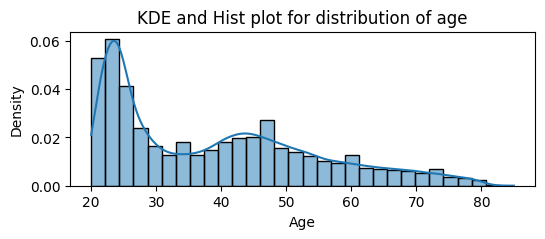

In [65]:
plt_his_ked("Age",df,30)

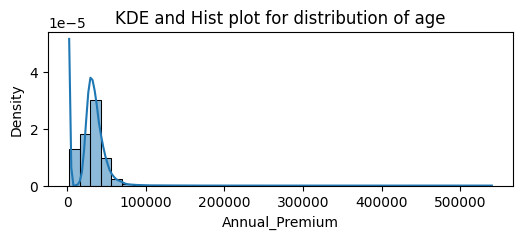

In [67]:
plt_his_ked("Annual_Premium",df,40)

<Axes: >

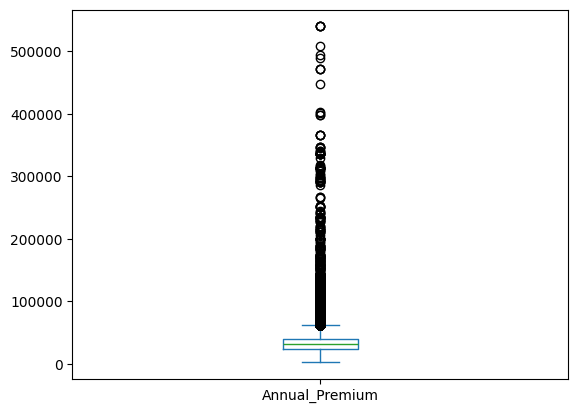

In [78]:
df["Annual_Premium"].plot(kind="box")

In [103]:
df[df["Annual_Premium"]>200000]["Response"]


1412      1
11319     0
13426     0
15024     0
25532     1
         ..
368263    0
371910    0
372492    0
373415    0
376777    0
Name: Response, Length: 112, dtype: int64

<Axes: >

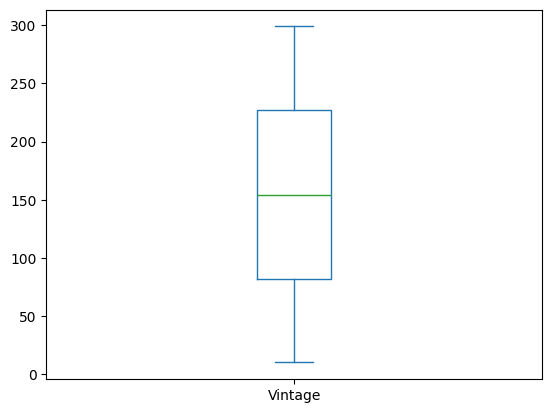

In [85]:
df["Vintage"].plot(kind="box")

In [91]:
df["Driving_License"].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [92]:
df["Previously_Insured"].value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

<Axes: ylabel='count'>

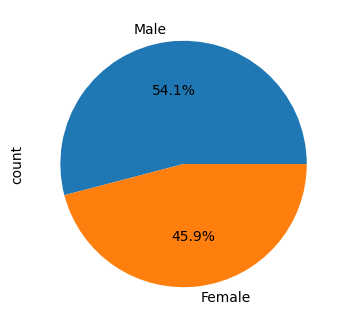

In [111]:
df["Gender"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(4,4)
)


<Axes: ylabel='count'>

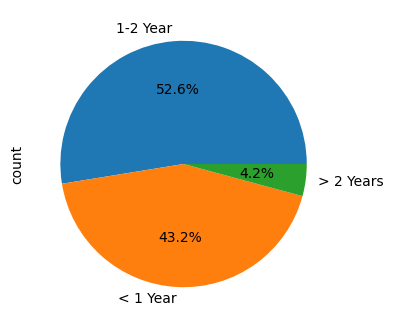

In [115]:
df["Vehicle_Age"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(4,4)
)


In [117]:
df["Vehicle_Damage"].value_counts(normalize=True)*100

Vehicle_Damage
Yes    50.487656
No     49.512344
Name: proportion, dtype: float64

# Univariate Analysis Conclusion

 1. There is no outlier present in the age column that is error or not valid. So it is not good to remove these kind of data.

 2. Outlier presents in column Annual premium are also valid so we cannot remove them.

<Axes: xlabel='Gender', ylabel='Response'>

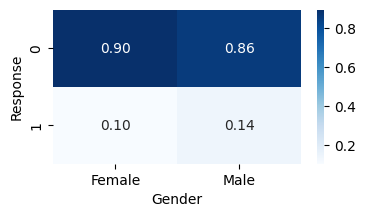

In [125]:
R_G=pd.crosstab(df["Response"],df["Gender"],normalize="columns")
plt.figure(figsize=(4,2))
sns.heatmap(
    R_G,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)

<Axes: xlabel='Vehicle_Age', ylabel='Response'>

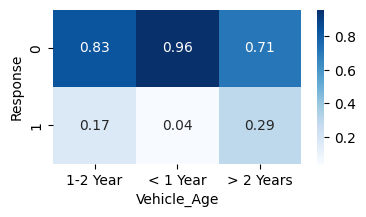

In [ ]:
R_V=pd.crosstab(df["Response"],df["Vehicle_Age"],normalize="columns")
plt.figure(figsize=(4,2))
sns.heatmap(
    R_G,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)